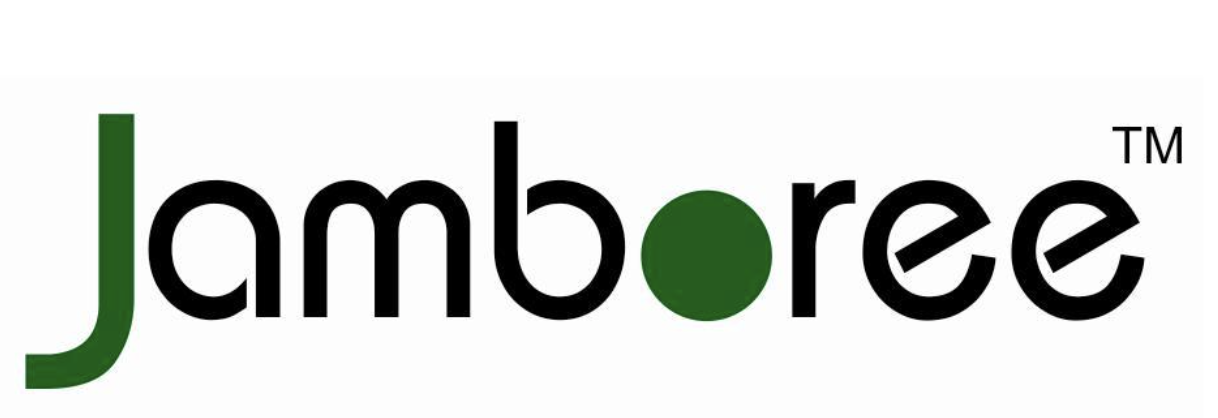

**About Dataset**
---


---

Jamboree has helped thousands of students make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/ learners can come to their website and check their probability of getting into the IVY league colleges. This feature estimates the chances of graduate admission from an Indian perspective.

Feature Profiling:

---


1.   Serial No. - Unique row ID
2.   GRE Score - out of 340
3.   TOEFL Score - out of 120
4.   University Rating - out of 5
5.   SOP - Strength of Statement of Purpose (out of 5)
6.   LOR - Strength of Letter of Recommendation (out of 5)
7.   CGPA - Undergraduate GPA (out of 10)
8.   Research - Research Experience (either 0 or 1)
9.   Chance of Admit - (either 0 or 1)


---

**Problem Statement:**

---
Analyse the predictor variables to draw insights about the importance of various factors in prediction of chances of graduate admission and how they are related to each other.

---

#Load Dataset

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
!gdown 1qFpgEi0XefGm8ADpp-dVJBky8X1HwSQS

Downloading...
From: https://drive.google.com/uc?id=1qFpgEi0XefGm8ADpp-dVJBky8X1HwSQS
To: /content/jamboree_dataset.csv
100% 16.2k/16.2k [00:00<00:00, 27.6MB/s]


In [3]:
df = pd.read_csv('jamboree_dataset.csv')
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [4]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 500 rows and 9 columns


#EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**No Missing Values**

In [8]:
df.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','LOR ':'LOR','Chance of Admit ':'Chance_of_Admit'}, inplace=True)

In [9]:
df.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [10]:
for i in df.columns[1:]:
  print(f'\nThe unique values in "{i}" are : \n{df[i].unique()}', end='\n'+'*'*100+'\n')


The unique values in "GRE_Score" are : 
[337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
****************************************************************************************************

The unique values in "TOEFL_Score" are : 
[118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
****************************************************************************************************

The unique values in "University_Rating" are : 
[4 3 2 5 1]
****************************************************************************************************

The unique values in "SOP" are : 
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
****************************************************************************************************

The unique values in "LOR" are : 
[4.5 3.5 2.5 3.  4.  1.5

AS we observe that "University_Rating", "SOP", "LOR" and "Research" has *categorical* values, let's convert them to categorical features.

In [11]:
df[['University_Rating','SOP','LOR','Research']] = df[['University_Rating','SOP','LOR','Research']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Serial No.         500 non-null    int64   
 1   GRE_Score          500 non-null    int64   
 2   TOEFL_Score        500 non-null    int64   
 3   University_Rating  500 non-null    category
 4   SOP                500 non-null    category
 5   LOR                500 non-null    category
 6   CGPA               500 non-null    float64 
 7   Research           500 non-null    category
 8   Chance_of_Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(3)
memory usage: 22.7 KB


#Univariate Analysis

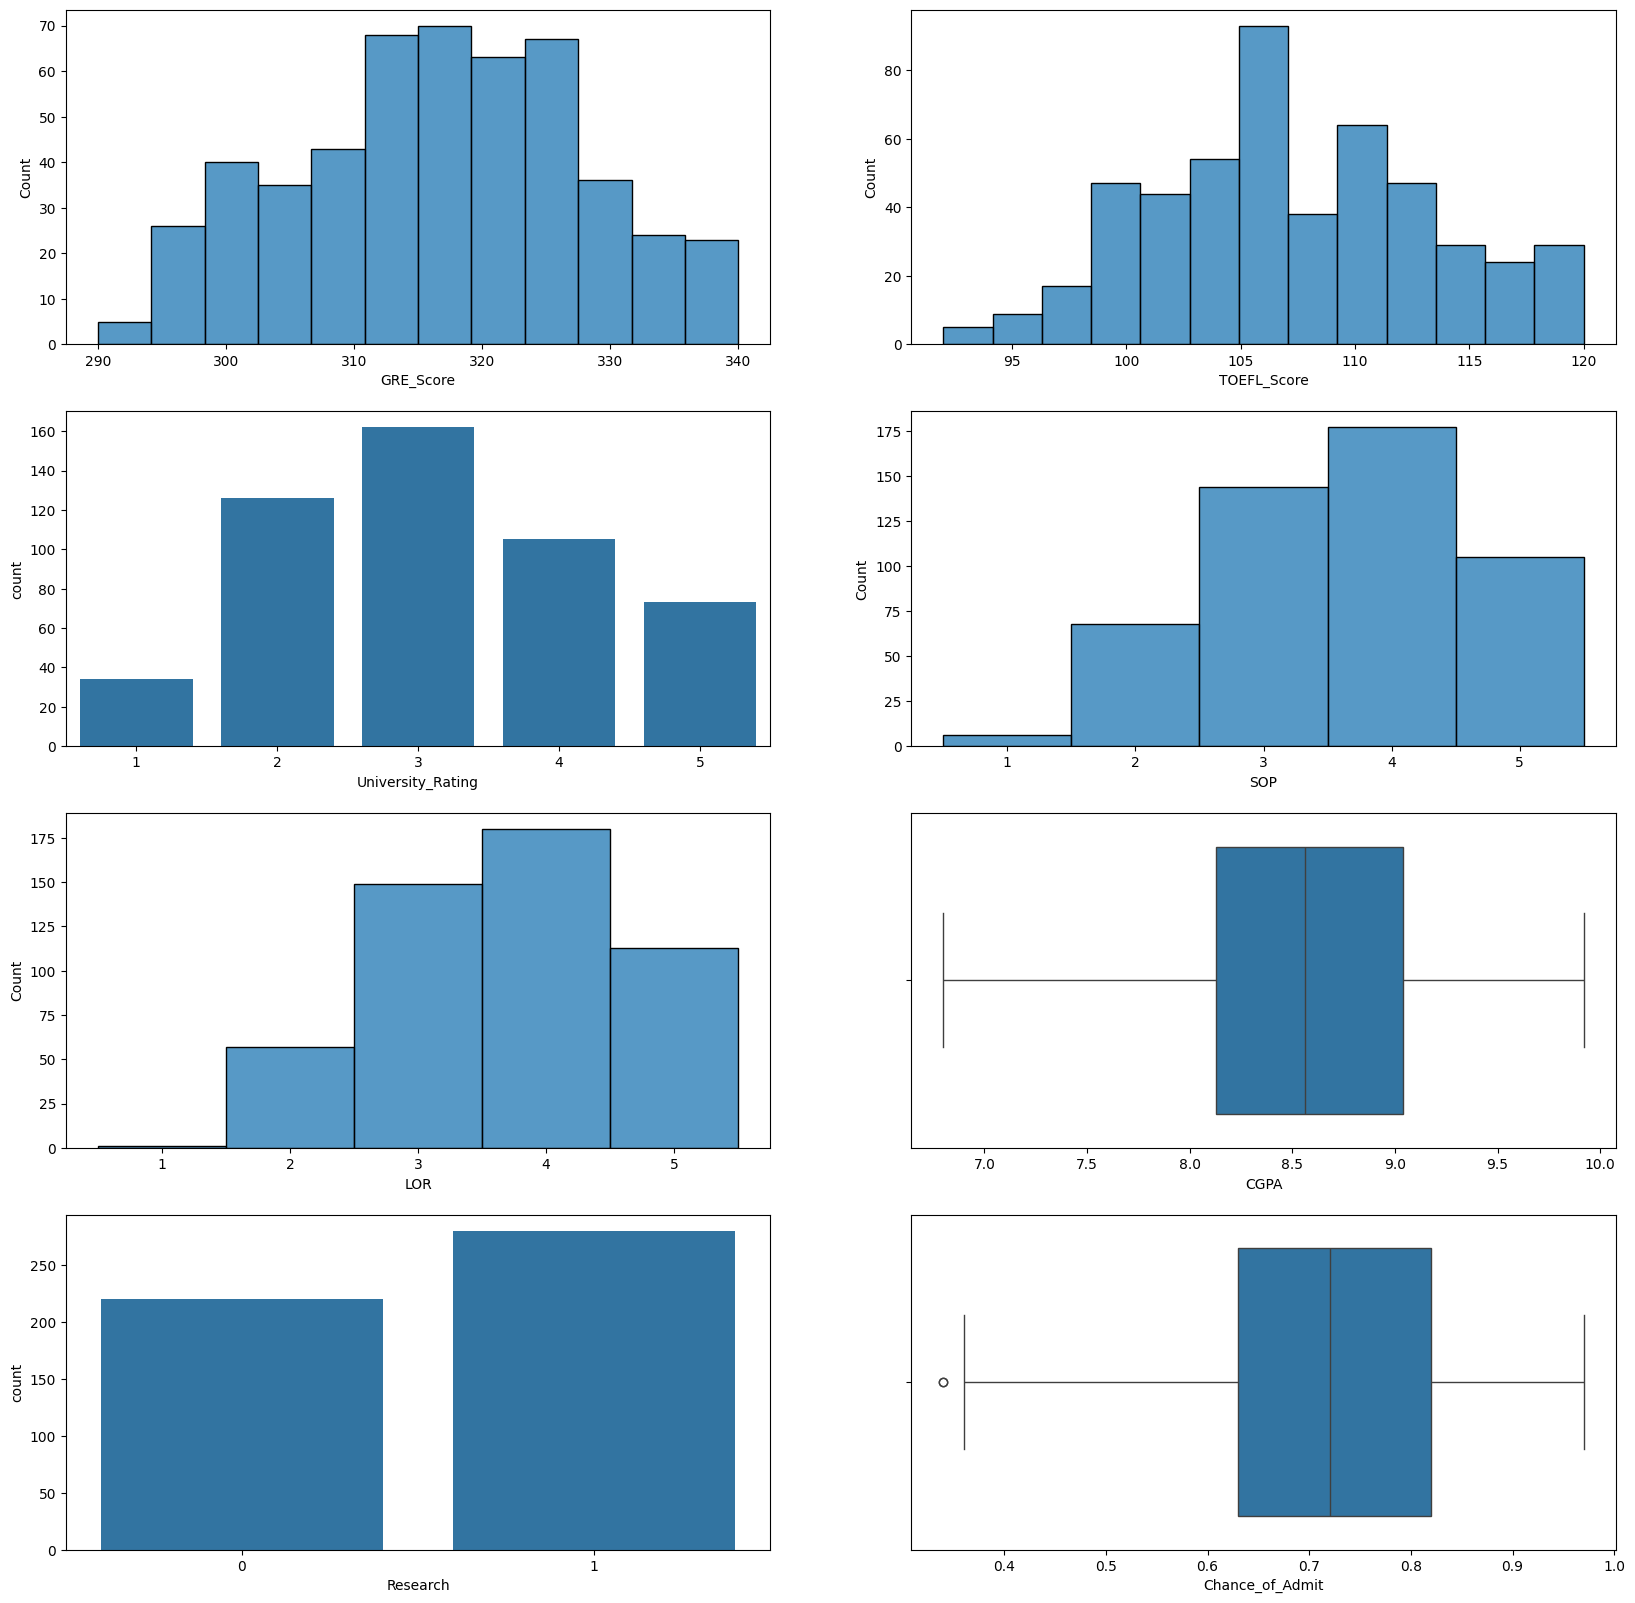

In [12]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.histplot(x='GRE_Score', data=df)

plt.subplot(4,2,2)
sns.histplot(x='TOEFL_Score', data=df)

plt.subplot(4,2,3)
sns.countplot(x='University_Rating', data=df)

plt.subplot(4,2,4)
sns.histplot(x='SOP', data=df)

plt.subplot(4,2,5)
sns.histplot(x='LOR', data=df)

plt.subplot(4,2,6)
sns.boxplot(x='CGPA', data=df)

plt.subplot(4,2,7)
sns.countplot(x='Research', data=df)

plt.subplot(4,2,8)
sns.boxplot(x='Chance_of_Admit', data=df)

plt.show()

**Insight**

---
Most of the aspirants have a

*   GRE_Score of 312 to 327,
*   TOEFL_Score of 105 to 111,
*   Universoty_Ranking of 3,
*   LOR of 4,
*   CGPA of 8.1 to 9.1, and
*   Chance_of_Admit of 72%.

---

#Bivariate and Multivariate Analysis

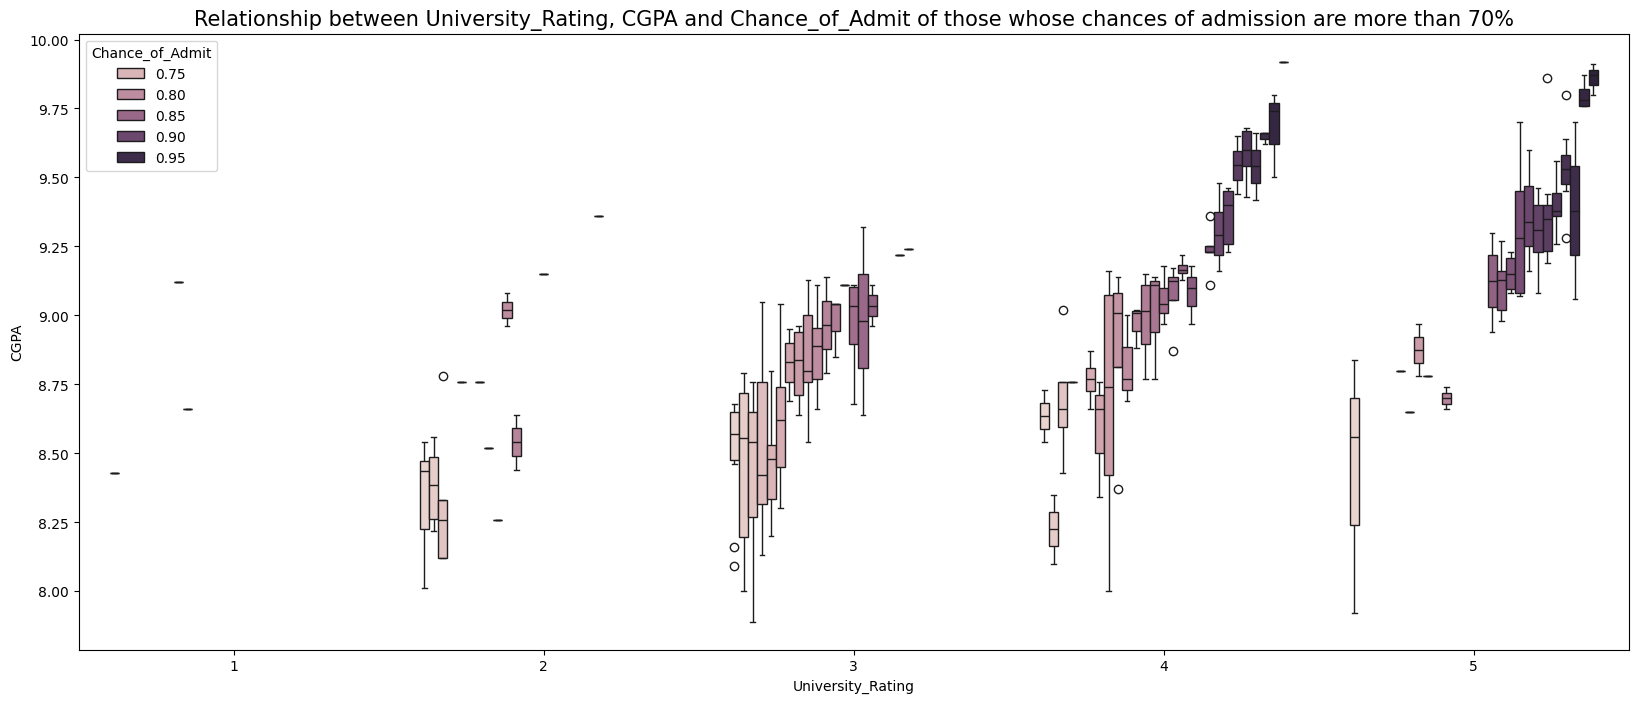

In [13]:
plt.figure(figsize=(20,8))
sns.boxplot(x='University_Rating', y='CGPA', hue='Chance_of_Admit', data=df[df['Chance_of_Admit']>0.7])
plt.title('Relationship between University_Rating, CGPA and Chance_of_Admit of those whose chances of admission are more than 70%', fontsize=15)
plt.show()

**Insight**

---


*   As we filter those whose chances of getting admission is more than 70%, we observe that a higher University_Rating along with a higher CGPA helps improve chances of admission.

*   More precisely, an aspirant having a University_Rating of 4 and a CGPA of 9 will have 85% chances of getting admission.

*   Also, an aspirant having University_Rating of 5 and a CGPA of 9.25 will have 95% chances of getting admission.
---


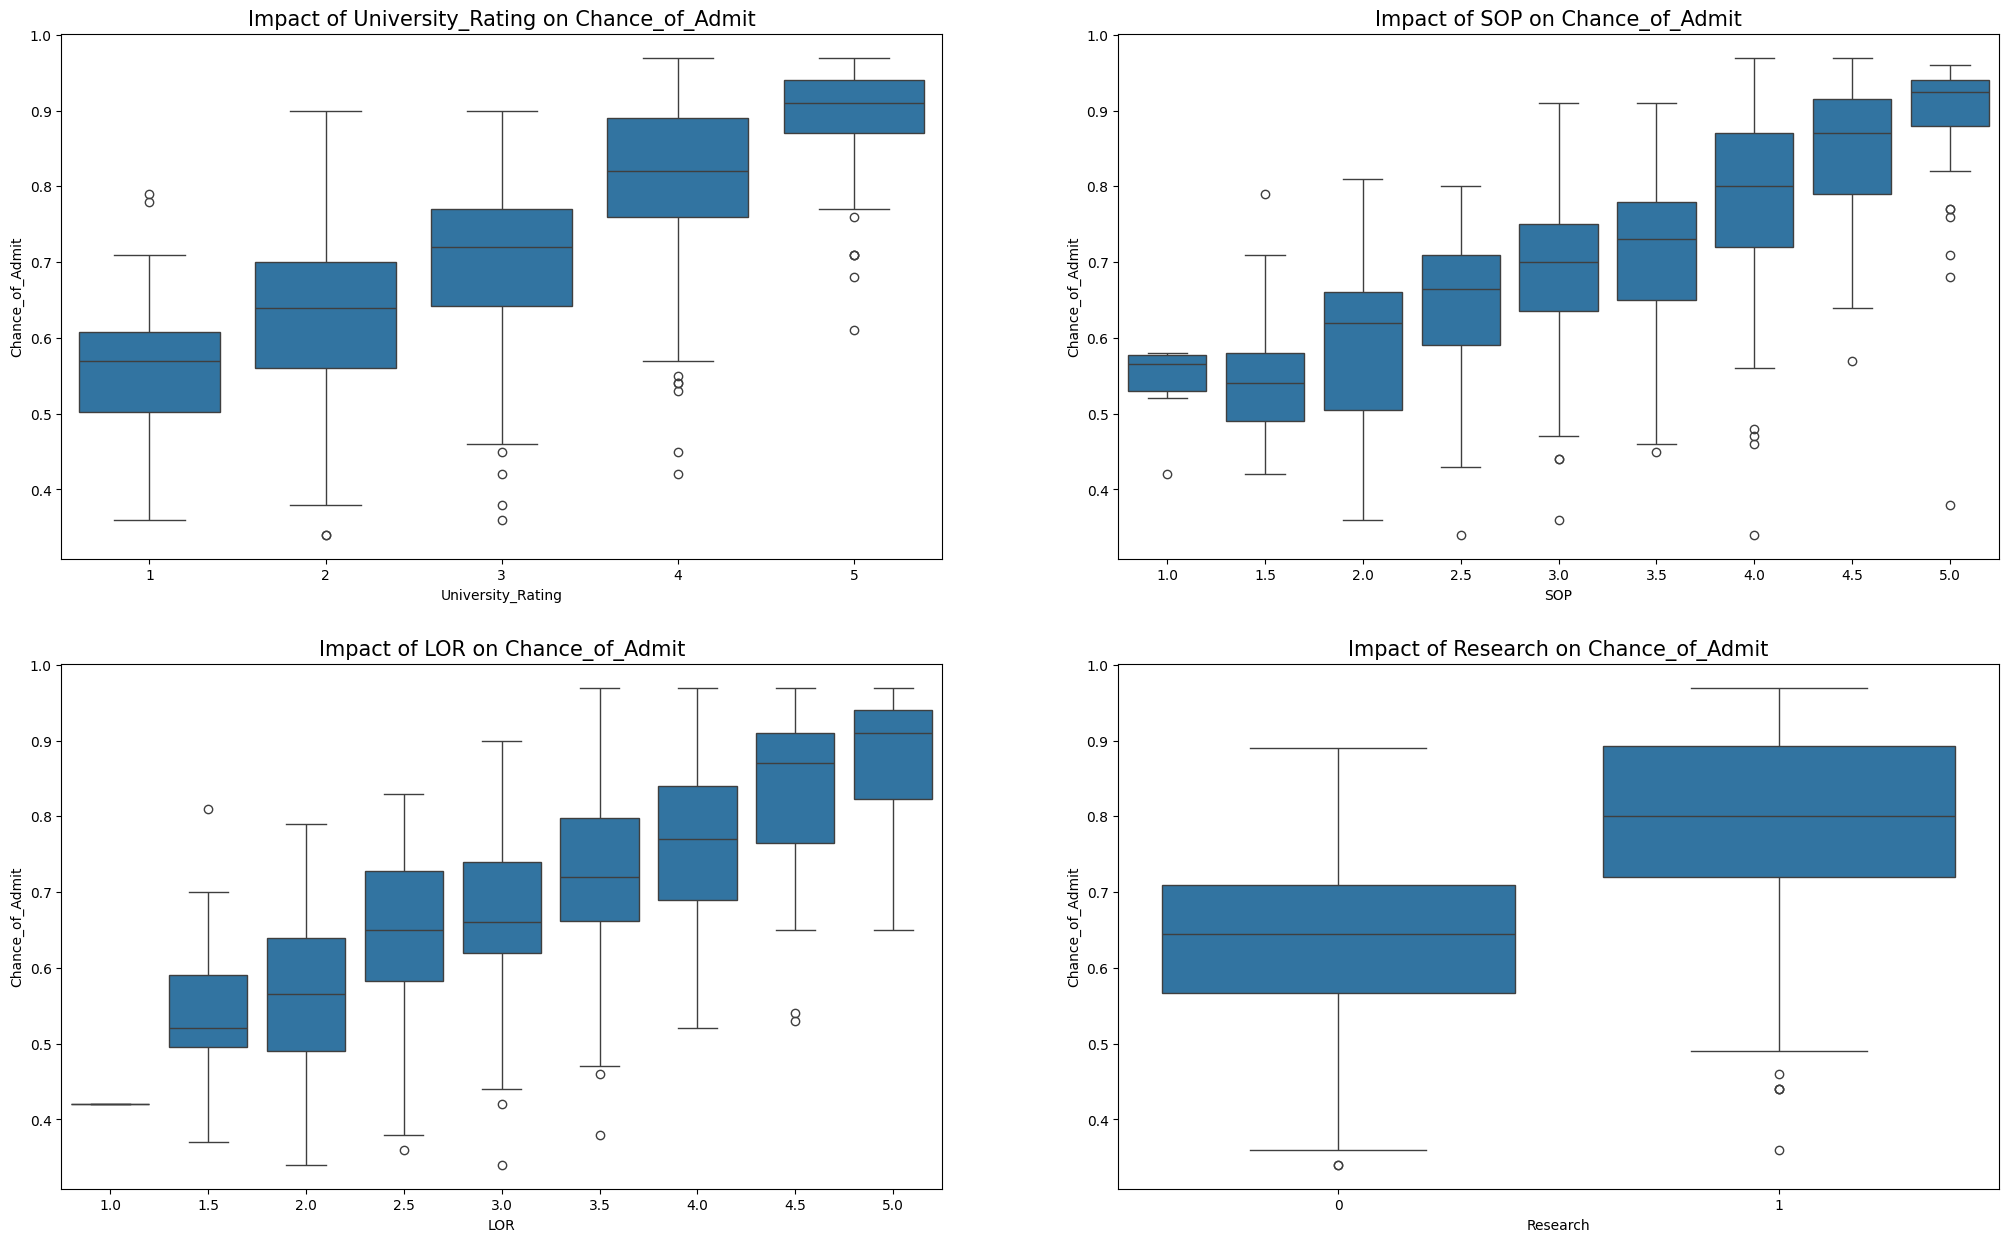

In [14]:
cat_cols = df.select_dtypes(include=['category']).columns
plt.figure(figsize=(25,15))
i=1
for col in cat_cols:
  plt.subplot(2,2,i)
  sns.boxplot(x=col, y='Chance_of_Admit', data = df)
  plt.title(f"Impact of {col} on Chance_of_Admit", fontsize=15)
  plt.xlabel(col)
  plt.ylabel('Chance_of_Admit')
  i+=1

plt.show()

**Insight**

---
*   University_Rating, SOP, LOR and Research; all these features impact Chances_of_Admit.

---

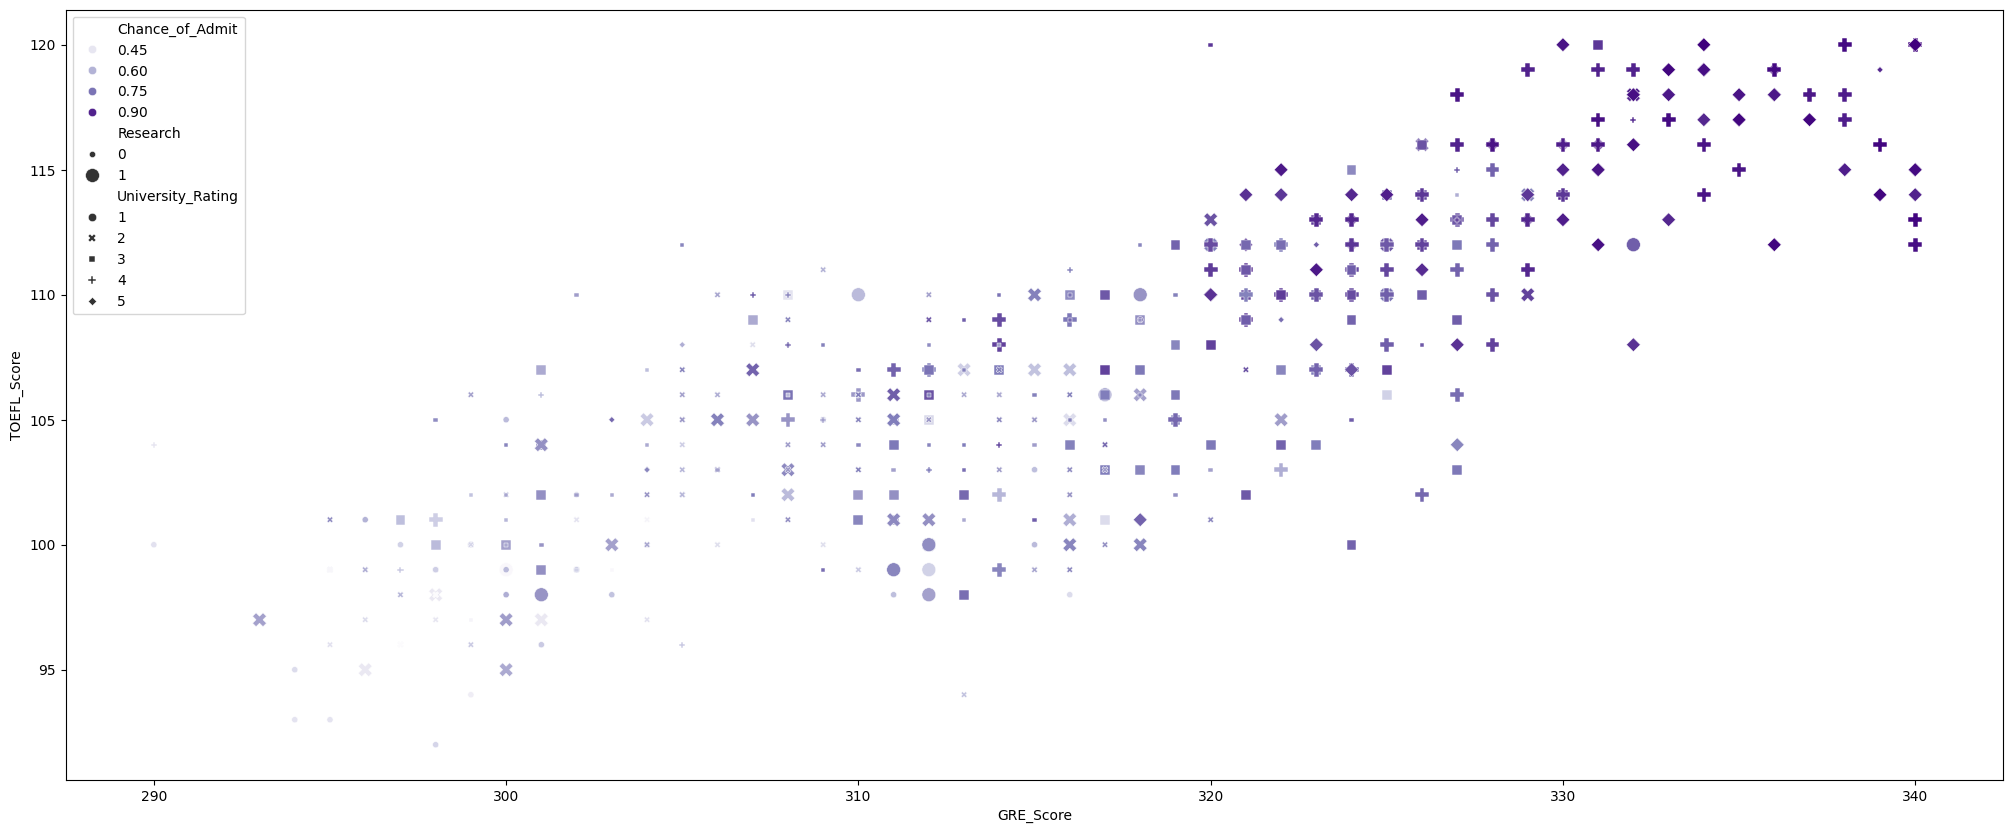

In [29]:
plt.figure(figsize=(25,10))
sns.scatterplot(x='GRE_Score', y='TOEFL_Score', data=df, hue='Chance_of_Admit', size='Research', sizes=[20,100], size_order=[0,1], style='University_Rating', palette='Purples')
plt.show()

**Insight**

---
*   Better GRE_Scores, TOEFL_Scores, University_Rating along with Research increases the chances of admission significantly.


*   More precisely, an aspirant having a GRE_Score of 320, a TOEFL_Score of of 110 and a Research will have 80% chances of getting admission.


*   Also, an aspirant having a GRE_Score of 330, a TOEFL_Score of of 110 and a Research will have 90% chances of getting admission.

*   Most aspirants whose Chance_of_Admit is 0.9, belong to a university whose University_Rating is 4 or 5.

---

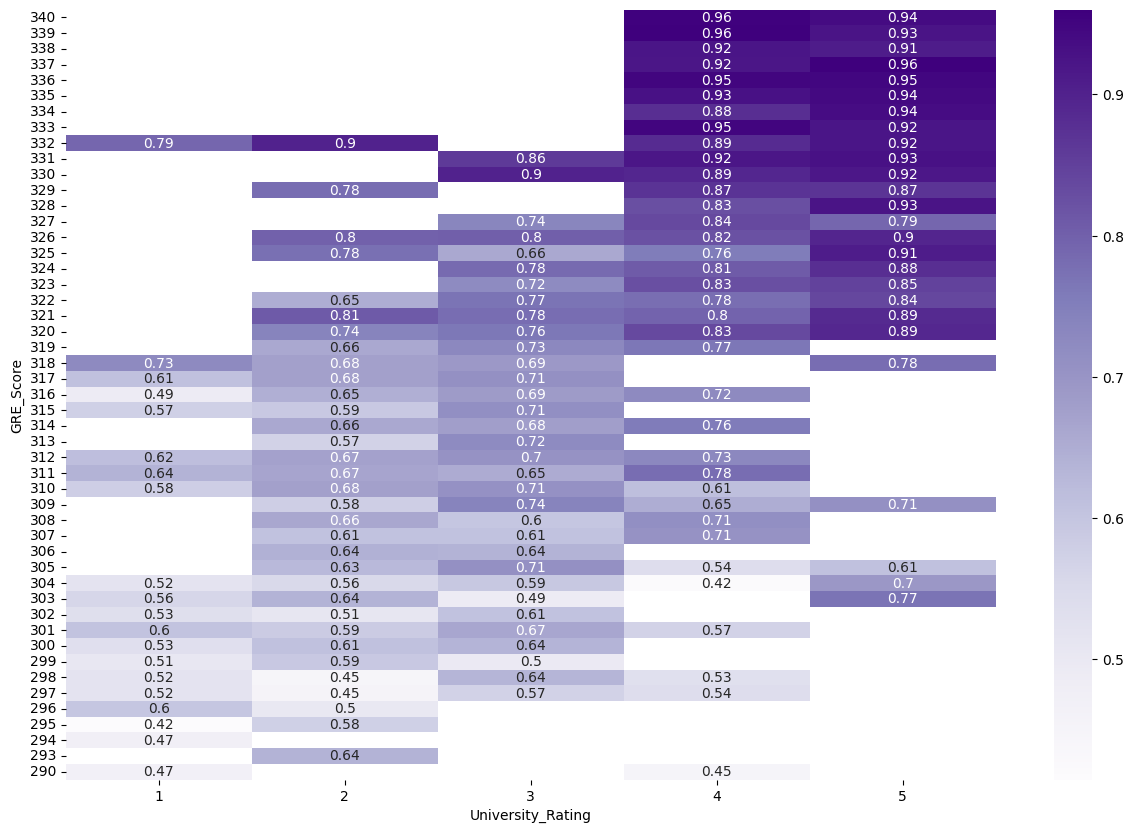

In [30]:
pivot_df=df.pivot_table(values='Chance_of_Admit', columns='University_Rating', index='GRE_Score')
pivot_df.sort_values(by='GRE_Score', ascending=False, inplace=True)
plt.figure(figsize=(15,10))
sns.heatmap(pivot_df, cmap='Purples', annot=True)
plt.show()

**Insight**

---

*   An aspirant having University_Rating of 4 and a GRE_Score of 330 will have a 90% chances of getting admission.

*   Also, chances are the same in case an aspirant having University_Rating of 5 and a GRE_Score of 324.

---

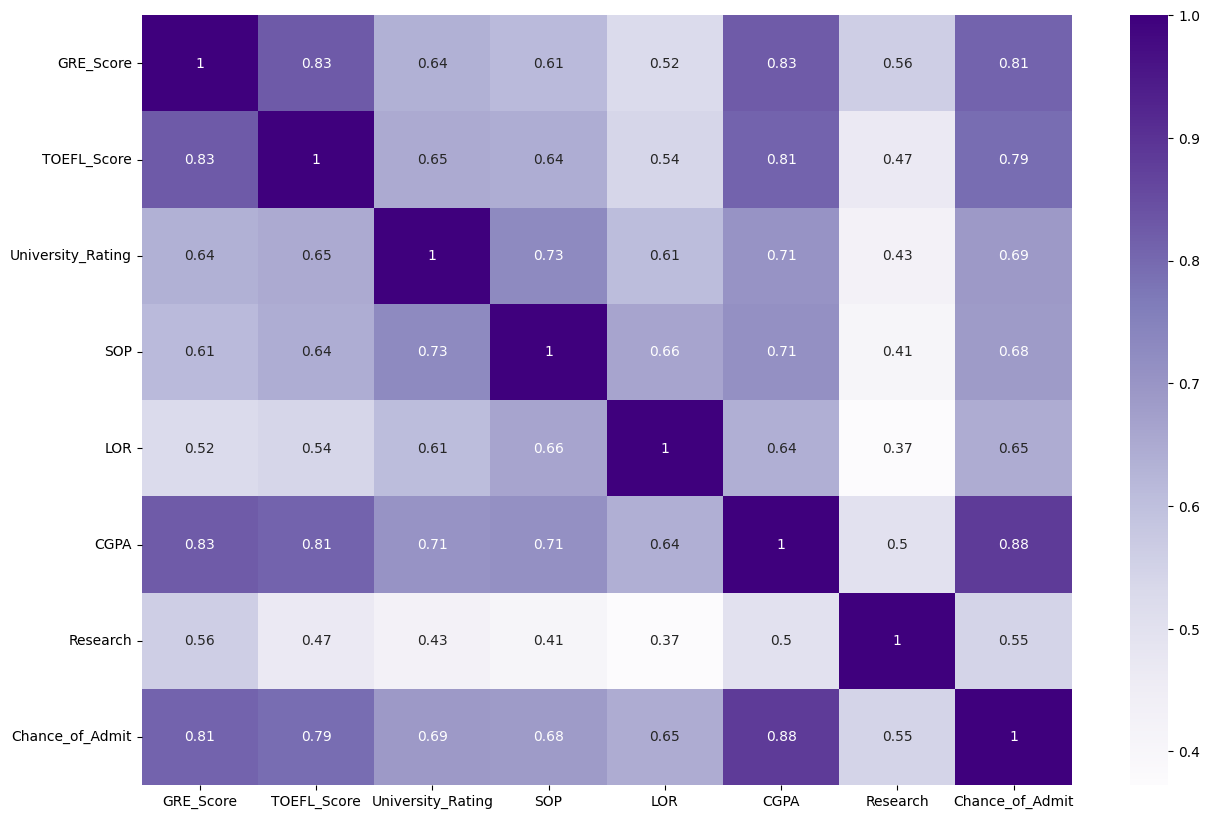

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,1:].corr(numeric_only=False), cmap='Purples', annot=True)
plt.show()

**Insight**

---
From all these visual analyses, the features that are strongly correlated to Chance_of_Admit are:
*   CGPA
*   GRE_Score
*   TOEFL_Score

What's also interesting to see in this heatmap is GRE,TOEFL_Score and GRE_Score are also strongly correlated to each other.

---



#Handling Outliers and Duplicates

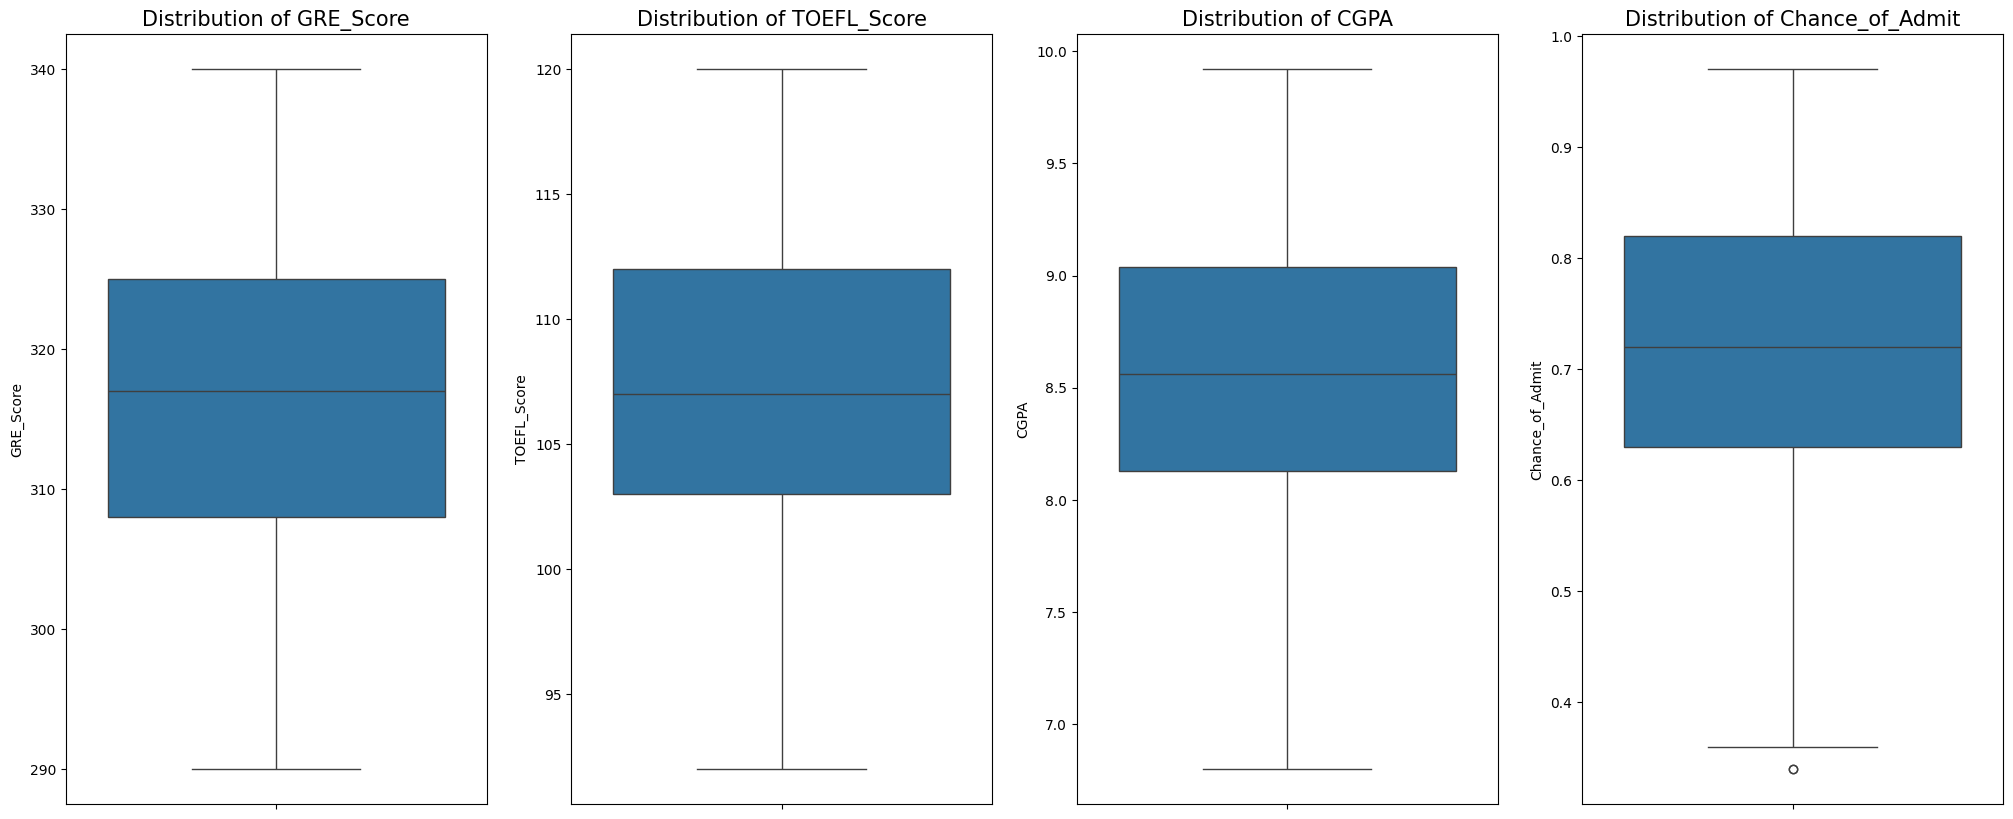

In [32]:
num_cols = df.select_dtypes(include=['int','float']).columns[1:]
i=1
plt.figure(figsize=(25,10))
for col in num_cols:
  plt.subplot(1,4,i)
  sns.boxplot(y=col, data=df)
  plt.title(f'Distribution of {col}', fontsize=15)
  i += 1
plt.show()

**No Outliers**

In [33]:
print(f'There are {df[df.duplicated()].shape[0]} duplicate rows')

There are 0 duplicate rows


#Train-Test Split & Standardisation

In [34]:
print(f'Numerical columns are : {num_cols}')
num_cols = list(num_cols)
num_cols.remove('Chance_of_Admit')
print(f'Numerical columns after removing the target feature, i.e, Chance_of_Admit are : {num_cols}')

Numerical columns are : Index(['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit'], dtype='object')
Numerical columns after removing the target feature, i.e, Chance_of_Admit are : ['GRE_Score', 'TOEFL_Score', 'CGPA']


In [35]:
cat_cols = list(cat_cols)
print(f'Categorical columns are : {cat_cols}')
cat_cols = list(cat_cols)

Categorical columns are : ['University_Rating', 'SOP', 'LOR', 'Research']


In [36]:
x = df[num_cols+cat_cols]
x.head(3)

,GRE_Score,TOEFL_Score,CGPA,University_Rating,SOP,LOR,Research
0,337,118,9.65,4,4.5,4.5,1
1,324,107,8.87,4,4.0,4.5,1
2,316,104,8.00,3,3.0,3.5,1


In [37]:
y = df[['Chance_of_Admit']]
y.head(3)

,Chance_of_Admit
0,0.92
1,0.76
2,0.72


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('-'*35)
print('Details of Train DataFrame')
print('-'*35)
print(f'Number of rows in x_train = {x_train.shape[0]}')
print(f'Number of rows in y_train = {y_train.shape[0]}')
print()
print('-'*35)
print('Details of Test DataFrame')
print('-'*35)
print(f'Number of rows in x_test = {x_test.shape[0]}')
print(f'Number of rows in y_test = {y_test.shape[0]}')

-----------------------------------
Details of Train DataFrame
-----------------------------------
Number of rows in x_train = 400
Number of rows in y_train = 400

-----------------------------------
Details of Test DataFrame
-----------------------------------
Number of rows in x_test = 100
Number of rows in y_test = 100


In [ ]:
scaler_x = MinMaxScaler()
scaler_x.fit(x)

In [40]:
x_train[x_train.columns] = scaler_x.transform(x_train[x_train.columns])
x_train.head(3)

,GRE_Score,TOEFL_Score,CGPA,University_Rating,SOP,LOR,Research
249,0.62,0.678571,0.650641,0.50,0.625,0.75,1.0
433,0.52,0.678571,0.557692,0.75,0.750,1.00,0.0
19,0.26,0.357143,0.544872,0.50,0.625,0.50,0.0


In [41]:
x_test[x_test.columns] = scaler_x.transform(x_test[x_test.columns])
x_test.head(3)

,GRE_Score,TOEFL_Score,CGPA,University_Rating,SOP,LOR,Research
361,0.88,0.857143,0.878205,0.75,0.750,0.625,1.0
73,0.48,0.571429,0.717949,0.75,0.875,0.750,1.0
374,0.50,0.464286,0.272436,0.25,0.250,0.375,0.0


#Linear Regression

In [42]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
y_predicted_train = lr.predict(x_train)
y_predicted_test = lr.predict(x_test)

In [44]:
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])

  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual, y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)

  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [47]:
model_evaluation(y_actual = y_train.values, y_forecast = y_predicted_train, model = lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


In [46]:
model_evaluation(y_actual = y_test.values, y_forecast = y_predicted_test, model = lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


**Insight**

---


*   Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model.

*   Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of Chance_of_Admit is 4%.

*   Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%.

*   R2 Score of 0.82 means that our model captures 82% variance in the data.

*   Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction.

---

In [48]:
for feature, weight in zip(x_train.columns, lr.coef_[0]):
  print(f"Weight of {feature}: {np.round(weight,2)}")

Weight of GRE_Score: 0.12
Weight of TOEFL_Score: 0.08
Weight of CGPA: 0.35
Weight of University_Rating: 0.01
Weight of SOP: 0.01
Weight of LOR: 0.07
Weight of Research: 0.02


In [49]:
print(f'Bias term of the model {lr.intercept_}')

Bias term of the model [0.34696506]


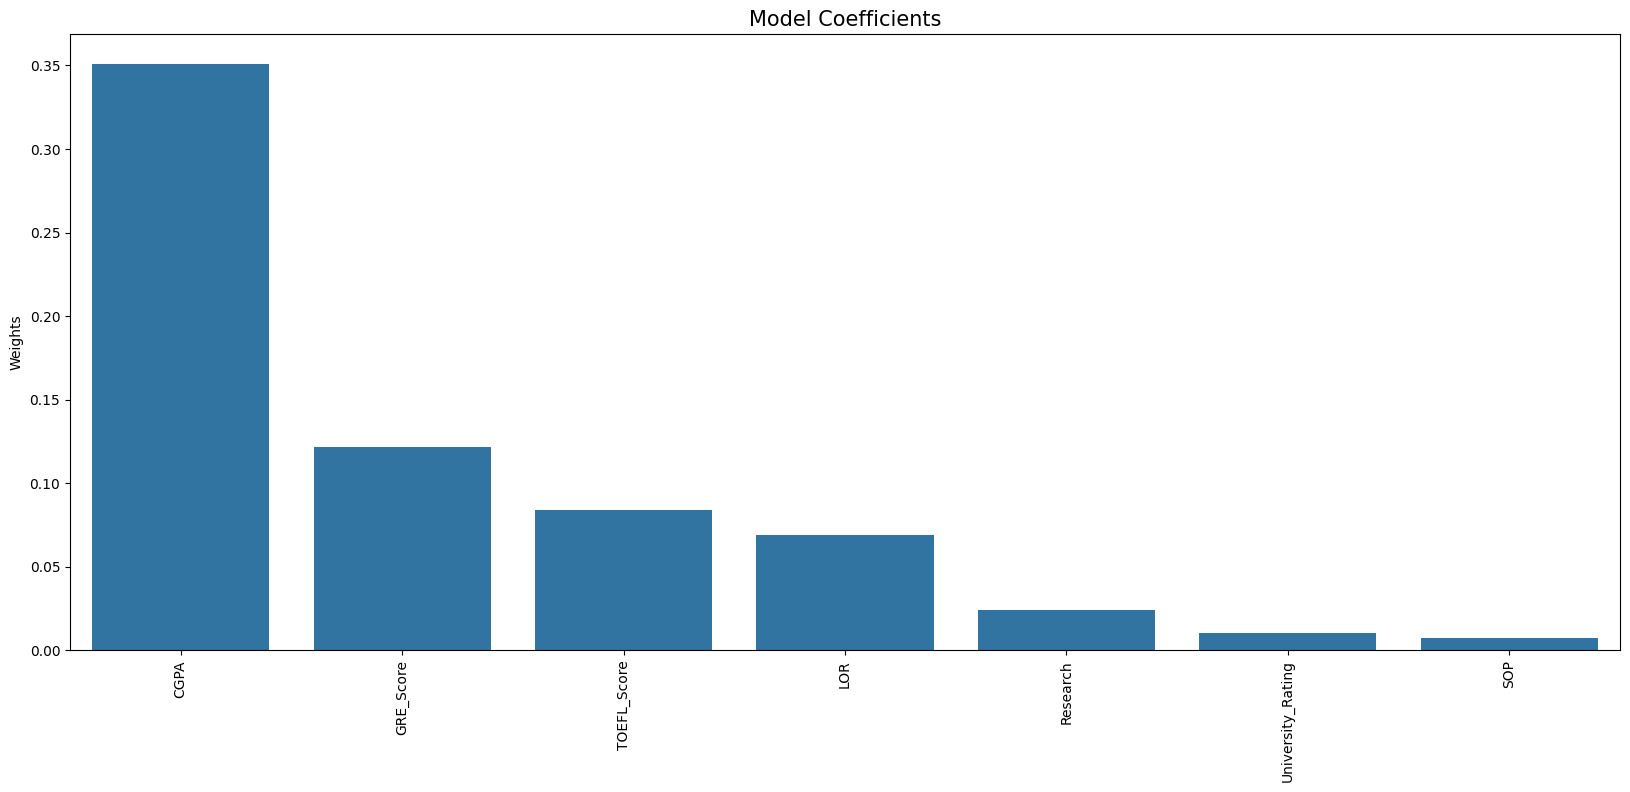

In [50]:
model_weights=list(zip(x_train.columns, lr.coef_[0]))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.figure(figsize=(20,8))
sns.barplot(x=features, y=weights)
plt.title('Model Coefficients', fontsize=15)
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show()

**Insight**

---


*   CGPA has the highest impact on Chance_of_Admit.

*   GRE_Score, TOEFL_Score and LOR also have a significant impact on Chance_of_Admit.

*   SOP, University_Rating, and Research have the lowest impact on Chance_of_Admit.


---

#Testing Assumptions of Linear Regression Model

## Multicolinearity Check

**VIF (Variance Inflation Factor)** is a measure that quantifies the severity of multicollinearity in a regression analysis. It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

---

The formula for VIF is as follows:

VIF(j) = 1 / (1 - R(j)^2)

where:

*   j represents the jth predictor variable.

*   R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables.

---

In [51]:
vif_df = pd.DataFrame()
vif_df['Variable'] = x_train.columns
vif_df['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif_df

,Variable,VIF
0,GRE_Score,31.185925
1,TOEFL_Score,26.753950
2,CGPA,41.732265
3,University_Rating,10.837374
4,SOP,18.864173
5,LOR,14.657099
6,Research,3.366187


**Insight**

---

*   We see that all the variables (except research) have a very high level of colinearity.

*   This was also observed from the correlation heatmap which showed strong positive correlation between GRE_Score, TOEFL_Score and CGPA.


---


## Mean of Residuals

The **mean of residuals** represents the average of residual values in a regression model. Residuals are the discrepancies (or errors) between the observed values and the values predicted by the regression model.  

---

*   The **mean of residuals** is useful to assess the overall bias in the regression model.

*   If the mean of residuals is close to zero, it indicates that the model is unbiased on average.

*   However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically over-estimating or underestimating the observed values.

---

In [52]:
residuals = y_test.values - y_predicted_test
residuals.reshape((-1,))
print(f'Mean of Residuals: {residuals.mean()}')

Mean of Residuals: -0.005453623717661285


**Insight**

---


*   Since the mean of residuals is very close to 0, we can say that the model is unbiased.

---

## Linearity of Variables

*Linearity of variables** refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

When we talk about "**no pattern in the residual plot**" in the context of linearity, we are referring to the plot of the residuals (the differences between the observed and predicted values of the dependent variable) against the predicted values or the independent variables.

*   Ideally, in a linear regression model, the residuals should be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

*   If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

  1. Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.

  2. U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.

  3. Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.

  4. Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.  

---

**CONCLUSION**

*   If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered.

*   Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot.

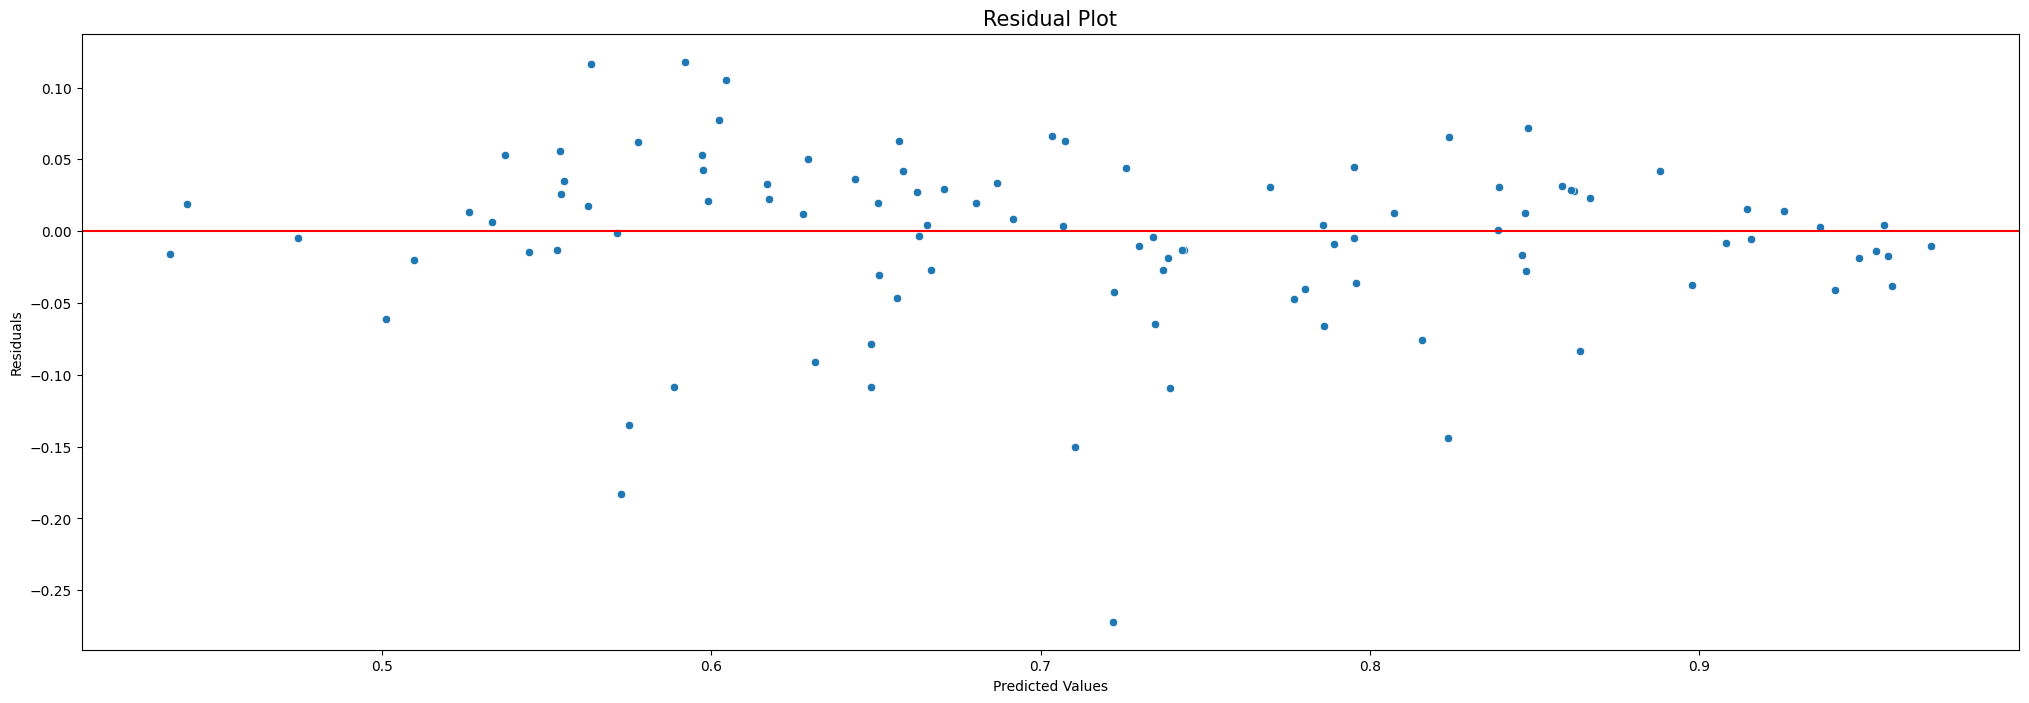

In [53]:
plt.figure(figsize=(25,8))
sns.scatterplot(x = y_predicted_test.reshape((-1,)), y = residuals.reshape((-1,)))

plt.title('Residual Plot', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

**Insight**

---

*   Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists

## Homoscedasticity

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

To test for homoscedasticity, there are several graphical and statistical methods that we can use:

1. Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

2. Scatterplot: If you have multiple independent variables, you can create scatter plots of the residuals against each independent variable separately. Again, look for any patterns or trends in the spread of the residuals.

3. Breusch-Pagan Test: This is a statistical test for homoscedasticity. It involves regressing the squared residuals on the independent variables and checking the significance of the resulting model. If the p-value is greater than a chosen significance level (e.g., 0.05), it suggests homoscedasticity. However, this test assumes that the errors follow a normal distribution.

4. Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity.

---

**CONCLUSION**

*   It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity.

*   Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

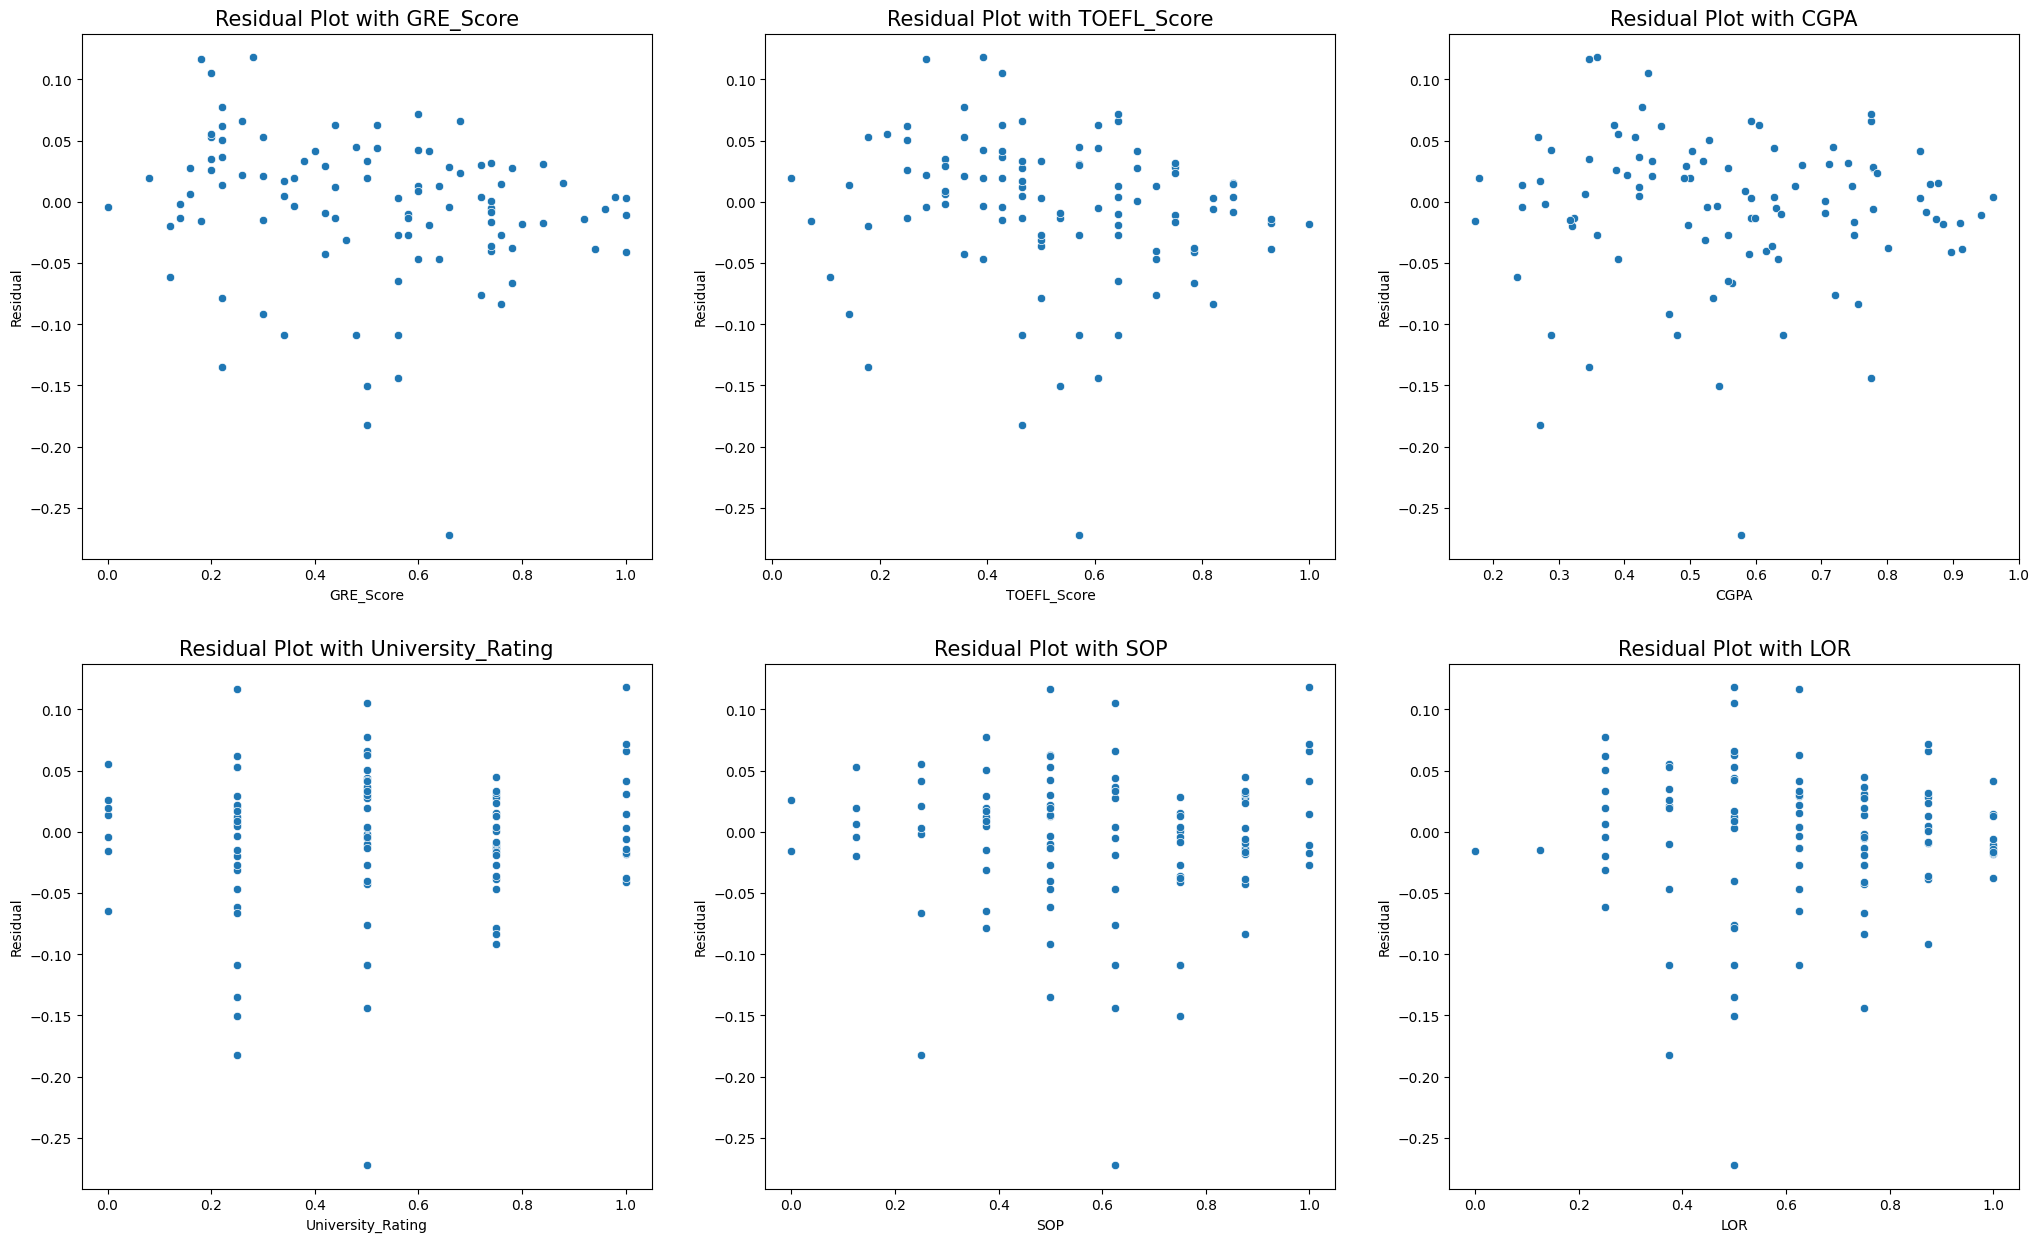

In [54]:
plt.figure(figsize=(25,15))
i=1
for col in x_test.columns[:-1]:
  plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}', fontsize=15)
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.show()

**Insight**

---

*   Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.

---

## Normality of Residuals

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, we can follow these steps:


1. Residual Histogram: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve.
  *   If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.


2. Q-Q Plot (Quantile-Quantile Plot): This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution.
  *   If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.


3. Shapiro-Wilk Test: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value.
  *   If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.


4. Skewness and Kurtosis: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

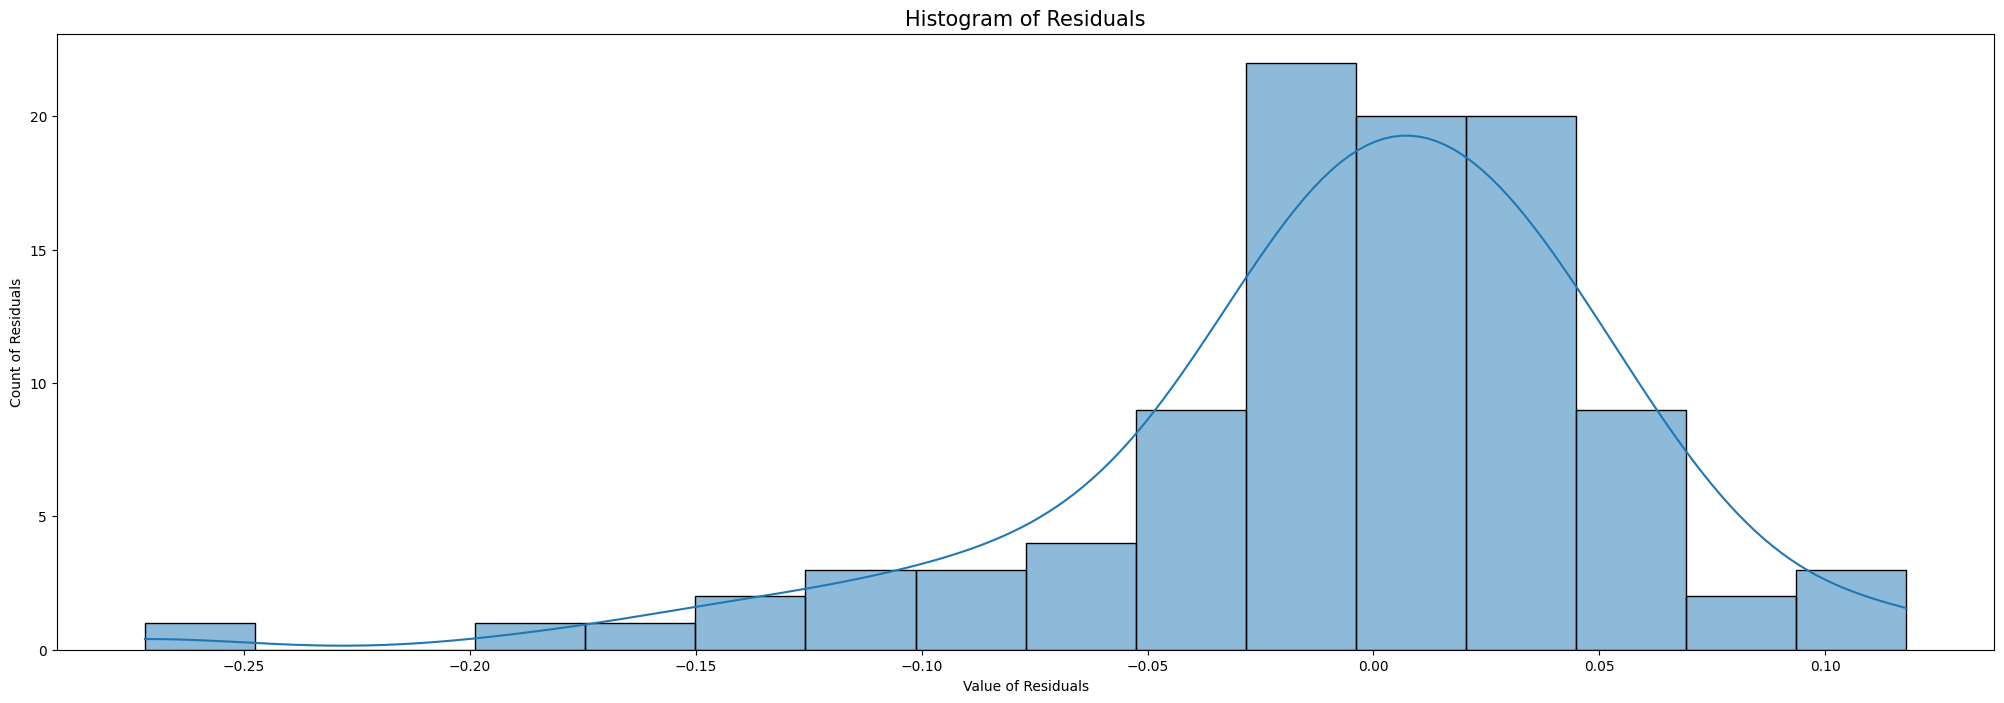

In [55]:
plt.figure(figsize=(25,8))
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals', fontsize=15)
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show()

**Insight**

---

*   The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution.

---

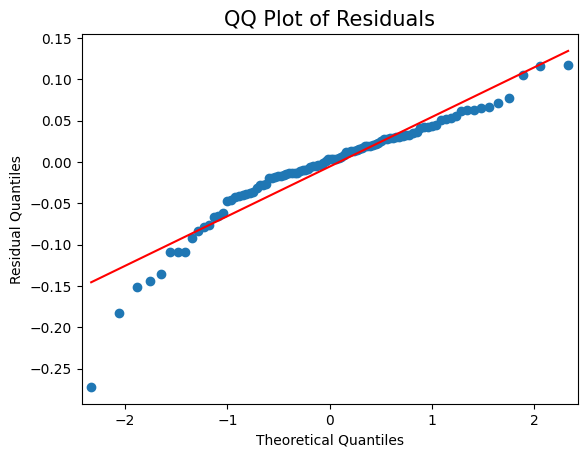

In [56]:
sm.qqplot(residuals.reshape((-1,)), line='r')
plt.title('QQ Plot of Residuals', fontsize=15)
plt.ylabel('Residual Quantiles')
plt.show()

**Insight**

---

*   The QQ plot shows that residuals are slightly deviating from the straight diagonal(regression) line.

---

# Lasso and Ridge Regression

**Ridge** and **Lasso** regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

---

**Ridge Regression:**

*   Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha).

*   The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model.

*   Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).

---

**Lasso Regression:**

*   Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha).

*   Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection.

*   This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.


---

The main differences between Ridge and Lasso regression are:

*   Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero.

*   On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.

*   Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together.

*   Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

---

In [57]:
ridge = Ridge()
lasso = Lasso()

In [58]:
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)

Lasso()

In [59]:
y_train_ridge = ridge.predict(x_train)
y_test_ridge = ridge.predict(x_test)

y_train_lasso = lasso.predict(x_train)
y_test_lasso = lasso.predict(x_test)

In [60]:
print('-'*35,'\nRidge Regression Training Accuracy')
model_evaluation(y_actual = y_train.values, y_forecast = y_train_ridge, model = ridge)

print('-'*35,'\nRidge Regression Test Accuracy')
model_evaluation(y_actual = y_test.values, y_forecast = y_test_ridge, model = ridge)

print('-'*35,'\nLasso Regression Training Accuracy')
model_evaluation(y_actual = y_train.values, y_forecast = y_train_lasso, model = lasso)

print('-'*35,'\nLasso Regression Test Accuracy')
model_evaluation(y_actual = y_test.values, y_forecast = y_test_lasso, model = lasso)

----------------------------------- 
Ridge Regression Training Accuracy
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82
----------------------------------- 
Ridge Regression Test Accuracy
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81
----------------------------------- 
Lasso Regression Training Accuracy
MAE: 0.11
RMSE: 0.14
R2 Score: 0.0
Adjusted R2: -0.02
----------------------------------- 
Lasso Regression Test Accuracy
MAE: 0.12
RMSE: 0.14
R2 Score: -0.01
Adjusted R2: -0.09


**Insight**

---

*   While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data.

---

# Identifying Best Model

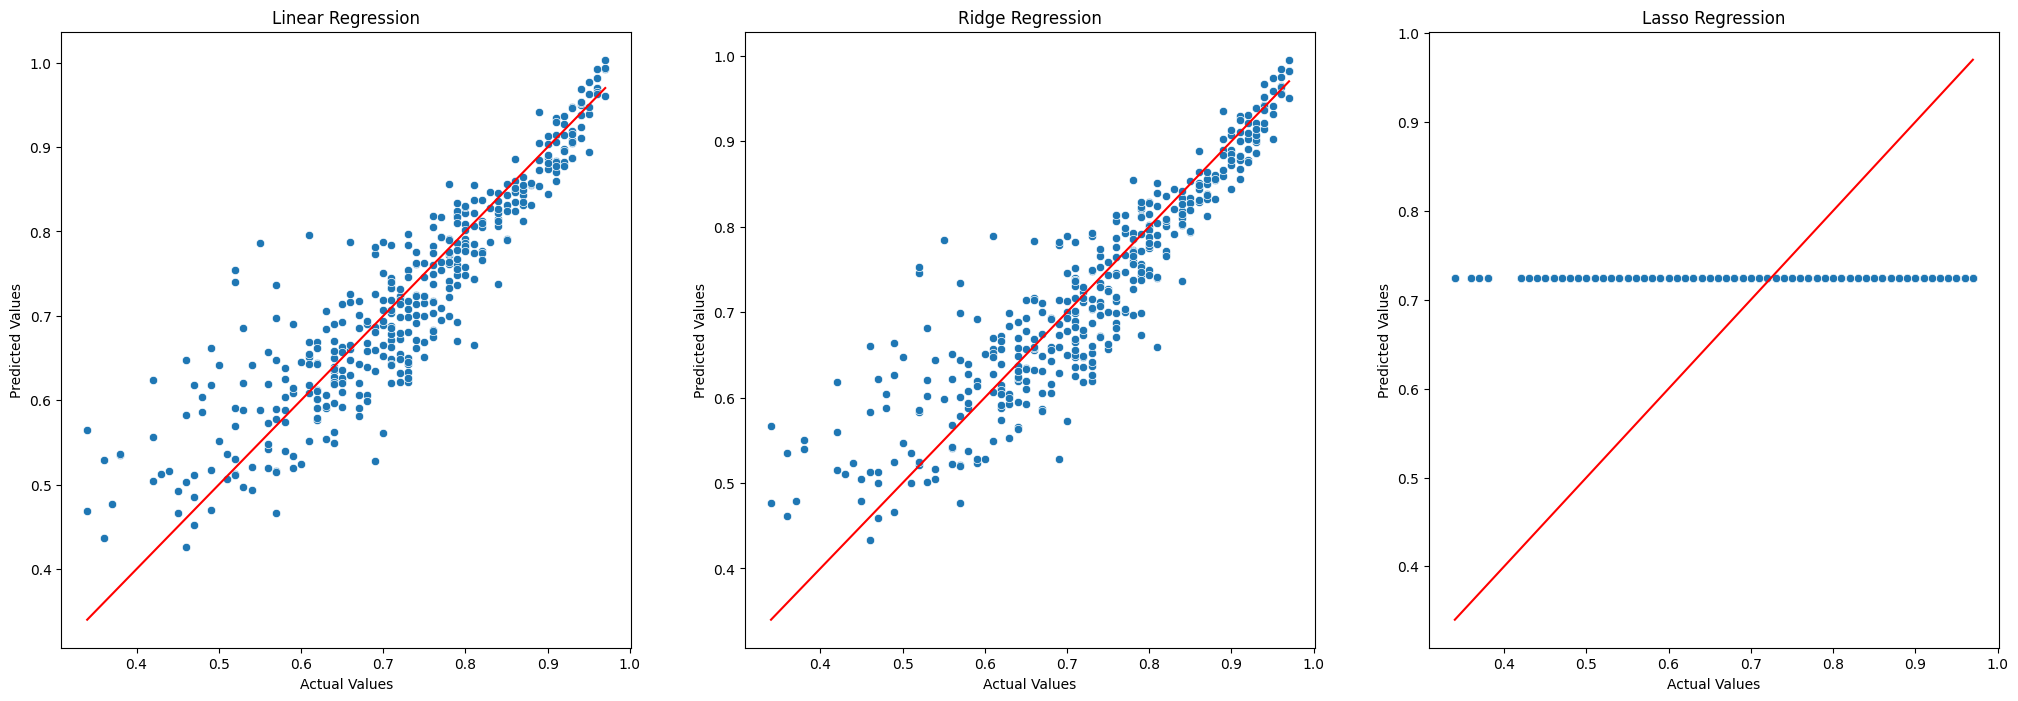

In [61]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_predicted_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(25,8))
i=1
for preds in predicted_values:
  plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'r-')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.show()

**Insight**

---

*   We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

*   This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

---

# Insights & Recommendations

**Insights:**

---

* The distribution of the target variable (Chance_of_Admit) is left-skewed.

* GRE_Score, TOEFL_Score and CGPA have a strong positive correlation with Chance_of_Admit. They also have high correlation amongst themselves.

* The categorical variables such as University_Ranking, Research, SOP and LOR also show an upward trend for Chance_of_Admit.

* From the  model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP and University_Rating are the least significant.

* Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (Chance_of_Admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results.

* Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.

---

**Recommendations:**

---

* Since GRE_Score, TOEFL_Score and CGPA are highly correlated, it is recommended to add more independent features for better prediction.

* Examples of other independent variables could be Essay, Work Experience, Internships, Mock Interview Performance and diversity variables.

---